In [1]:
# import all necessary libraries and packages
import matplotlib.pyplot as plt
import nltk 
import numpy as np
import pandas as pd 
import seaborn as sns 
import csv
import chardet

In [2]:
# import scikit-learn library and Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# opening csv file in binary mode
with open("C:/Users/isabe/Documents/TextClassifier/spamtext.csv", 'rb') as file:
    raw_data = file.read(2000)
    
    # analysing byte sequence to determine a likely encoding
    result = chardet.detect(raw_data)
    encoding = result['encoding']
    
print("Detected Encoding:", encoding)

Detected Encoding: ISO-8859-1


In [4]:
# import dataset of spam and ham text messages
with open("C:/Users/isabe/Documents/TextClassifier/spamtext.csv", 'r', encoding='ISO 8859-1') as file:
    data = list(csv.reader(file))

# convert list into pandas DataFrame
data = pd.DataFrame(data[1:], columns=data[0])
    
# converting spam/ham column into binary labels
# spam = 1, ham = 0
data['v1'] = np.where(data['v1']=='spam',1,0)

In [5]:
# checking first 10 rows of dataframe
data.head(10)

,v1,v2,,,
0,0,"Go until jurong point, crazy.. Available only ...",,,
1,0,Ok lar... Joking wif u oni...,,,
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,0,U dun say so early hor... U c already then say...,,,
4,0,"Nah I don't think he goes to usf, he lives aro...",,,
5,1,FreeMsg Hey there darling it's been 3 week's n...,,,
6,0,Even my brother is not like to speak with me. ...,,,
7,0,As per your request 'Melle Melle (Oru Minnamin...,,,
8,1,WINNER!! As a valued network customer you have...,,,
9,1,Had your mobile 11 months or more? U R entitle...,,,


First, we will divide the raw dataset into training and testing datasets. I will be using the Term Frequency-Inverse Document Frequency(TF-IDF) format to represent the training data. It is used to convert text data into a numerical matrix representation.

In [6]:
# splitting the training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(data['v2'], 
                                                    data['v1'], 
                                                    random_state = 0)

# create a feature matrix including n-grams of unigrams and bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)

# displays the training data set 
# (number of messages, number of n-grams)
print(X_train_vectorized.toarray().shape)

(4179, 40704)


### Baseline Performance

The results are as follows:  
- 83.10% of spams caught (Predicted spam that was actual spam)
- 0.18% legitimate messages blocked (Predicted spam that was actual ham)
- 97.64% accuracy rate

I can use these results as a benchmark to gauge the success of my Naive Bayes classifier.

### Classification Approach

Using the sklearn API, we are creating a multinomial Naive Bayes model, and training it with the dataset. After which, we will apply the trained classifier to the test set. We will use the 'predict' method to obtain the predicted labels for the test set.

In [7]:
#create the naive bayes classifier
classifier = MultinomialNB(alpha = 0.1)

# training the classifier with the training dataset
classifier.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=0.1)

In [8]:
# use the trained classifier to make predictions on the test dataset
# convert test data with vectorizer
predictions = classifier.predict(vectorizer.transform(X_test))

accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

# displaying scores in % for easier visualisation
print("Accuracy:", 100 * accuracy, "%")
print("Precision:", 100 * precision, "%")
print("Recall:", 100 * recall, "%")
print("F1 score", 100 * f1, "%")

Accuracy: 98.34888729361091 %
Precision: 99.43181818181817 %
Recall: 88.83248730964468 %
F1 score 93.8337801608579 %


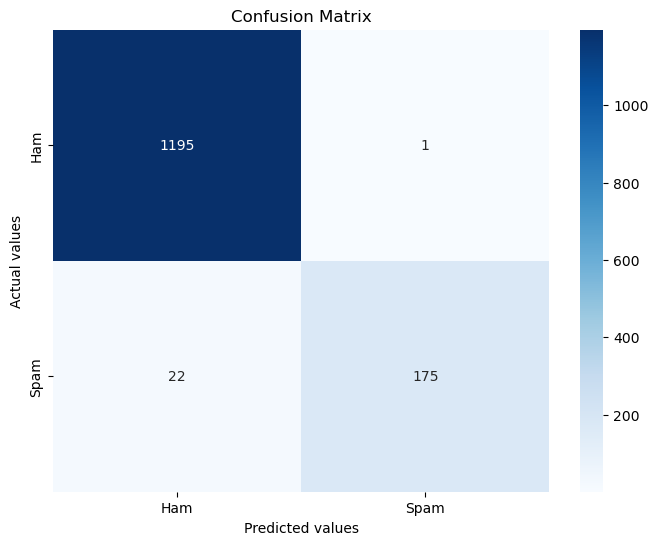

In [9]:
# generate confusion matrix
confM = confusion_matrix(Y_test, predictions)

# create a dataframe 
confM_df = pd.DataFrame(confM, index=['Ham', 'Spam'], columns=['Ham', 'Spam'])

# plot the confusion matrix table 
plt.figure(figsize=(8,6))
sns.heatmap(confM_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

### Evaluation

- Recall: 88.83%   
The test values on my trained classifier has performed better than the baseline approach where 83.10% of spams caught. This means that 88.83% of predicted spam texts were actually spam messages. This is a relatively high recall value, which means that there is a low number of spam messages incorrectly classified (as ham/non-spam). 

- Precision: 99.43%   
This means that 99.43% of predicted ham/non-spam texts were actually ham messages. This is a very high precision value, which means that there is an extremely low number of ham messages being incorrectly classified (as spam). 

- Accuracy: 98.35%   
The 98.35% accuracy rate is higher than that of the baseline approach's Support ector Machines. However, due to the imbalanced nature of the dataset, this will not be part of the evaluation metrics. 

- Legitimate messages blocked: 1/1195  
While also not part of my evaluation metrics, it is still worth noting that my trained classifier did have an error of 0.08% of legitimate messages blocked, which is still an improvement from the baseline approach's 0.18% error. 

- F1-score: 93.83%  
Lastly, the F-measure had a relatively positive score which shows that the classifier had a fairly good performance and balance between recall and precision. To evaluate on the effectiveness of my classifier, I can safely say that the risk for false negatives is definitely higher than the risk for a false positive, which is what we seek in a spam detection classifier, to correctly identify spam messages with minimal incorrect filtration of legitimate messages.


### References

1. https://www.researchgate.net/publication/258050187_Contributions_to_the_Study_of_SMS_Spam_Filtering_New_Collection_and_Results_preprint#pf9
2. https://www.springboard.com/blog/data-science/bayes-spam-filter/
3. https://www.analyticsvidhya.com/blog/2022/07/end-to-end-project-on-sms-email-spam-detection-using-naive-bayes/
4. https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download
